In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = pd.read_csv('./training_data.csv')
training_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
818,13,271,1,Starship Troopers (1997),1,47,1,0
434,655,213,4,"Room with a View, A (1986)",7,50,0,1
267,405,404,4,Pinocchio (1940),3,22,0,1
147,405,941,1,With Honors (1994),7,22,0,1
461,655,402,2,Ghost (1990),15,50,0,1
533,655,1436,2,Mr. Jones (1993),7,50,0,1
140,405,318,5,Schindler's List (1993),7,22,0,1
127,405,1562,1,"Eye of Vichy, The (Oeil de Vichy, L') (1993)",6,22,0,1
764,13,40,2,"To Wong Foo, Thanks for Everything! Julie Newm...",4,47,1,0
701,13,428,5,Harold and Maude (1971),4,47,1,0


In [3]:
test_data = pd.read_csv('./test_data.csv')
test_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
572,13,867,5,"Whole Wide World, The (1996)",7,47,1,0
462,13,83,2,Much Ado About Nothing (1993),13,47,1,0
428,13,379,1,Tales From the Crypt Presents: Demon Knight (1...,10,47,1,0
398,655,182,4,GoodFellas (1990),5,50,0,1
523,13,795,2,Richie Rich (1994),3,47,1,0
451,13,872,3,Love Jones (1997),13,47,1,0
444,13,96,4,Terminator 2: Judgment Day (1991),14,47,1,0
499,13,92,3,True Romance (1993),13,47,1,0
200,405,196,1,Dead Poets Society (1989),7,22,0,1
410,13,787,3,Roommates (1995),7,47,1,0


In [4]:
valid_data = pd.read_csv('./valid_data.csv')
valid_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
413,13,231,3,Batman Returns (1992),0,47,1,0
496,13,211,4,M*A*S*H (1970),4,47,1,0
235,655,480,4,North by Northwest (1959),15,50,0,1
97,405,204,5,Back to the Future (1985),14,22,0,1
283,655,316,4,As Good As It Gets (1997),7,50,0,1
443,13,485,1,My Fair Lady (1964),11,47,1,0
134,405,1271,2,North (1994),4,22,0,1
118,405,843,2,"Shaggy Dog, The (1959)",3,22,0,1
363,655,528,5,"Killing Fields, The (1984)",7,50,0,1
402,13,818,3,Girl 6 (1996),4,47,1,0


In [5]:
with open('./recommendations.pkl', 'rb') as f:
    recommendations = pickle.load(f)
    
recommendations

defaultdict(list,
            {655: [(np.float64(-5.0), 423),
              (np.float64(-4.523690220857802), 186),
              (np.float64(-4.476309779142198), 467),
              (np.float64(-4.476309779142198), 624),
              (np.float64(-4.476309779142198), 56),
              (np.float64(-4.047380441715605), 452),
              (np.float64(-3.523690220857802), 232),
              (np.float64(-4.047380441715605), 73),
              (np.float64(-4.047380441715605), 673),
              (np.float64(-3.476309779142198), 72),
              (np.float64(-1.0), 217),
              (np.float64(-3.094760883431209), 451),
              (np.float64(-3.523690220857802), 90),
              (np.float64(-3.476309779142198), 88),
              (np.float64(-1.9526195582843955), 308),
              (np.float64(-2.9526195582843955), 588),
              (np.float64(-4.047380441715605), 318),
              (np.float64(-3.476309779142198), 178),
              (np.float64(-2.4763097791421975), 416),


In [6]:
recommendations_dict = {
    'user_id': [],
    'movie_id' : [],
    'imputed_rating': [],
}
for user_id, recommendation_list in recommendations.items():
    recommendations_dict['user_id'] += ([user_id] * len(recommendation_list))
    recommendations_dict['movie_id'] += ([recommendation[1] for recommendation in recommendation_list])
    recommendations_dict['imputed_rating'] += ([-recommendation[0] for recommendation in recommendation_list])


recommendations_df = pd.DataFrame(recommendations_dict)
recommendations_df.sample(10)

,user_id,movie_id,imputed_rating
44,405,483,4.351731
117,13,670,2.252709
46,405,303,4.000000
53,405,124,3.703461
40,655,421,1.476310
87,405,875,2.296539
25,655,230,2.476310
13,655,88,3.476310
16,655,318,4.047380
66,405,918,2.351731


In [7]:
recommendations_df.shape

(137, 3)

In [8]:
test_merged_df = recommendations_df.merge(right=test_data, how='inner', on=['user_id', 'movie_id'])
print(test_merged_df.shape)
test_merged_df

(24, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,423,5.000000,3,E.T. the Extra-Terrestrial (1982),3,50,0,1
1,655,186,4.523690,3,"Blues Brothers, The (1980)",4,50,0,1
2,655,467,4.476310,3,"Bronx Tale, A (1993)",7,50,0,1
3,655,178,3.476310,4,12 Angry Men (1957),7,50,0,1
4,655,212,2.905239,3,"Unbearable Lightness of Being, The (1988)",7,50,0,1
5,655,514,2.905239,5,Annie Hall (1977),13,50,0,1
6,655,2,1.952620,3,GoldenEye (1995),15,50,0,1
7,655,396,1.952620,2,Serial Mom (1994),5,50,0,1
8,405,303,4.000000,1,Ulee's Gold (1997),7,22,0,1
9,405,198,3.648269,2,Nikita (La Femme Nikita) (1990),15,22,0,1


In [9]:
valid_merged_df = recommendations_df.merge(right=valid_data, how='inner', on=['user_id', 'movie_id'])
print(valid_merged_df.shape)
valid_merged_df

(32, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,56,4.476310,3,Pulp Fiction (1994),5,50,0,1
1,655,673,4.047380,3,Cape Fear (1962),15,50,0,1
2,655,451,3.094761,3,Grease (1978),4,50,0,1
3,655,88,3.476310,2,Sleepless in Seattle (1993),13,50,0,1
4,655,318,4.047380,4,Schindler's List (1993),7,50,0,1
5,655,226,2.952620,3,Die Hard 2 (1990),15,50,0,1
6,405,48,4.351731,1,Hoop Dreams (1994),6,22,0,1
7,405,64,4.351731,5,"Shawshank Redemption, The (1994)",7,22,0,1
8,405,208,3.703461,5,Young Frankenstein (1974),10,22,0,1
9,405,509,3.703461,1,My Left Foot (1989),7,22,0,1


In [10]:
test_merged_df['rating_diff'] = abs(test_merged_df['rating'] - test_merged_df['imputed_rating'])
test_merged_df['rating_diff'].mean()

np.float64(1.4169173230582104)

In [11]:
valid_merged_df['rating_diff'] = abs(valid_merged_df['rating'] - valid_merged_df['imputed_rating'])
valid_merged_df['rating_diff'].mean()

np.float64(1.5227479195404139)

In [12]:
for user_id in recommendations.keys():
    print(f'User {user_id}\'s MAE on test dataset:', test_merged_df.loc[test_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print(f'User {user_id}\'s MAE on valid dataset:', valid_merged_df.loc[valid_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print()

User 655's MAE on test dataset: 1.1009966088939285
User 655's MAE on valid dataset: 0.6982536278104033

User 405's MAE on test dataset: 2.140692213195008
User 405's MAE on valid dataset: 1.829653893402496

User 13's MAE on test dataset: 1.3176892560245983
User 13's MAE on valid dataset: 1.640117045275367



In [13]:
mape = (test_merged_df['rating_diff'] / test_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(32.406485861055145)

In [14]:
mape = (valid_merged_df['rating_diff'] / valid_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(22.6686919565485)

In [15]:
def precision_at_k(actual, predicted, k=5):
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / k

def recall_at_k(actual, predicted, k=5):
    total_num_rel_items = len(actual)
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / total_num_rel_items

def f1(actual, predicted, k=5):
    p = precision_at_k(actual, predicted, k=k)
    r = recall_at_k(actual, predicted, k=k)
    denom = 0

    if p == 0 and r == 0:
        denom = 0
    elif p == 0:
        denom = (1 / r)
    elif r == 0:
        denom = (1 / p)
    else:
        denom = ((1 / p) + (1 / r))

    if denom == 0:
        return 0
    
    return 2 / denom

In [16]:
test_actual = []
valid_actual = []

ordered_recommendations = []

for user_id in sorted(list(recommendations.keys())):
    print(user_id)
    test_actual.append(list(test_data.loc[test_data['user_id'] == user_id]['movie_id'].values))
    valid_actual.append(list(valid_data.loc[valid_data['user_id'] == user_id]['movie_id'].values))

    ordered_recommendations.append([np.int64(t[1]) for t in recommendations[user_id]])

13
405
655


In [17]:
ks = [int(k) for k in np.arange(5, 101, 5)]

user_a_precision = []
user_a_recall = []
user_a_f1 = []

user_b_precision = []
user_b_recall = []
user_b_f1 = []

user_c_precision = []
user_c_recall = []
user_c_f1 = []

for k in ks:
    user_a_precision.append(precision_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_recall.append(recall_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_f1.append(f1(test_actual[0], ordered_recommendations[0], k=k))
    
    user_b_precision.append(precision_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_recall.append(recall_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_f1.append(f1(test_actual[1], ordered_recommendations[1], k=k))

    user_c_precision.append(precision_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_recall.append(recall_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_f1.append(f1(test_actual[2], ordered_recommendations[2], k=k))


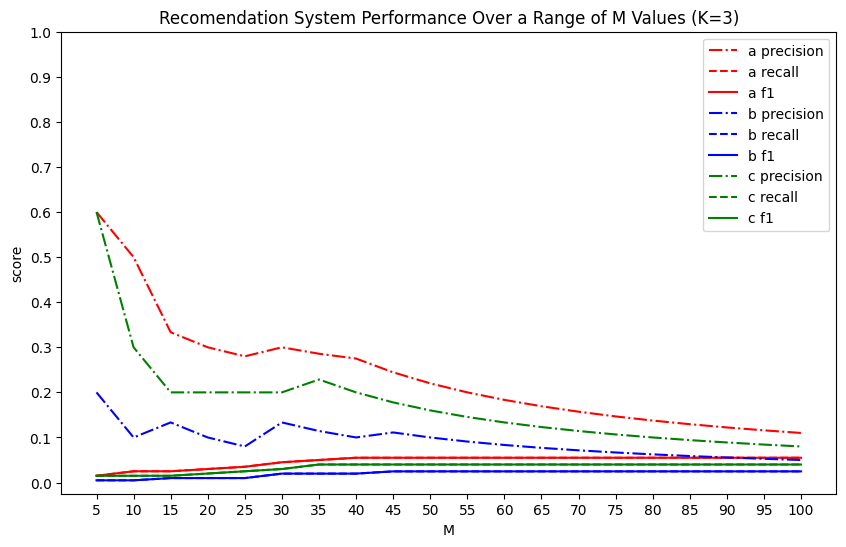

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(ks, user_a_precision, label="a precision", color="red", linestyle="-.")
plt.plot(ks, user_a_recall, label="a recall", color="red", linestyle="--")
plt.plot(ks, user_a_recall, label="a f1", color="red", linestyle="-")

plt.plot(ks, user_b_precision, label="b precision", color="blue", linestyle="-.")
plt.plot(ks, user_b_recall, label="b recall", color="blue", linestyle="--")
plt.plot(ks, user_b_recall, label="b f1", color="blue", linestyle="-")

plt.plot(ks, user_c_precision, label="c precision", color="green", linestyle="-.")
plt.plot(ks, user_c_recall, label="c recall", color="green", linestyle="--")
plt.plot(ks, user_c_recall, label="c f1", color="green", linestyle="-")


plt.xticks(ks)
plt.yticks(list(np.arange(0, 1.1, 0.1)))

plt.legend()

plt.title('Recomendation System Performance Over a Range of M Values (K=3)')
plt.xlabel('M')
plt.ylabel('score')

plt.show()